In [1]:
import pandas as pd
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

#Path to CSV
transportcsv = Path("Resources/nanda_transit_zcta.csv")
collegereadycsv = Path("Resources/CollegeReadiness_2017_2018_byZip_20181107.csv")
freelunchcsv = Path("Resources/FreeAndReducedLunch_Fall207_ByZIP_20181105.csv")
graduationcsv = Path("Resources/GraduationRates_2016_2017_byZip__20181019.csv")
usloccsv = Path("Resources/US.txt")

In [2]:
#Read in CSV to dataframes
transport_data = pd.read_csv(transportcsv)
collegeready_data = pd.read_csv(collegereadycsv)
freelunch_data = pd.read_csv(freelunchcsv)
graduation_data = pd.read_csv(graduationcsv)
usloc_data =pd.read_csv(usloccsv, sep="\t")

In [3]:
#Rename column so it can be merged
collegeready_data = collegeready_data.rename(columns={'ZCTA':'ZCTA5CE10'})
collegeready_data

,OBJECTID,GEOID10,MathNumAssessed,MathNumReady,AllSbjtNumReady,AllSbjtNumAssessed,EBRWNumAssessed,EBRWNumReady,FinalMathAveScore,FinalAllSbjtAveScore,FinalEWBRWAveScore,MathPctReady,AllSbjtPctReady,EBRWPctReady,Shape__Area,Shape__Length,ZCTA5CE10
0,1,2649883,25.0,0.0,0.0,25.0,25.0,6.0,404.800000,841.600000,436.800000,0.000000,0.000000,0.240000,7.789234e+09,5.799556e+05,49883
1,2,2649878,34.0,12.0,11.0,34.0,34.0,23.0,484.400000,983.500000,499.100000,0.352941,0.323529,0.676471,1.404697e+10,9.217413e+05,49878
2,3,2649855,285.0,115.0,107.0,285.0,285.0,181.0,507.962105,1033.437193,525.387368,0.403509,0.375439,0.635088,6.747444e+09,1.162098e+06,49855
3,4,2649408,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.995690e+09,3.517039e+05,49408
4,5,2649010,168.0,52.0,49.0,168.0,168.0,87.0,477.414286,967.171429,489.678571,0.309524,0.291667,0.517857,4.615699e+09,5.311028e+05,49010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,985,2648063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032694e+09,1.285146e+05,48063
985,986,2648414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.262379e+08,1.955999e+05,48414
986,987,2648701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.319999e+09,2.687271e+05,48701
987,988,2648733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.397144e+09,2.535510e+05,48733


In [4]:
#Fixing usloc_data, resetting indexes and correcting column names
fixed1_usloc_data = usloc_data.reset_index()
fixed1_usloc_data = usloc_data.reset_index(-1).reset_index(drop=True)
fixed2_usloc_data = fixed1_usloc_data.rename(columns={'level_1':'ZCTA5CE10',
                               'Country': 'Cities',
                               'Zip':'State',
                               'City':'Abbrev',
                               'State':'Area',
                               'Abbrev':'Something'})
fixed2_usloc_data


,ZCTA5CE10,Cities,State,Abbrev,Area,Something,Area,Something,Lat,Long,Nothing
0,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0
...,...,...,...,...,...,...,...,...,...,...,...
41478,96558,APO AA,NaN,NaN,NaN,NaN,NaN,NaN,19.7542,-155.5858,4.0
41479,96598,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-89.9976,139.2729,NaN
41480,96599,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-77.8460,166.6760,NaN
41481,96860,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,21.3448,-157.9774,4.0


In [5]:
#Merge of 3 CSVs into a dataframe on zip
merge1_df = pd.merge(freelunch_data, graduation_data, on=["ZCTA5CE10"])
merge2_df = pd.merge(merge1_df, collegeready_data, on=["ZCTA5CE10"])

In [6]:
#Filter zip from national to zips listed in other merged dataframes (i.e zips in michigan)
filter_usloc_data = fixed2_usloc_data[fixed2_usloc_data["ZCTA5CE10"].isin(merge2_df["ZCTA5CE10"])]
merge3_df = pd.merge(merge2_df, filter_usloc_data,on="ZCTA5CE10")

In [7]:
#Filter zip from national to zips listed in other merged dataframe (i.e. zips in michigan)
filter_data = transport_data[transport_data["zcta19"].isin(merge3_df["ZCTA5CE10"])]
filter_data

,zcta19,zcta_area,count_ntm_stops,totpop13_17,stops_per_capita,stops_per_sqmile
15734,48001,23.655580,0,11886.0,0.000000,0.000000
15736,48003,33.083480,0,6147.0,0.000000,0.000000
15737,48005,36.561310,0,5476.0,0.000000,0.000000
15739,48009,5.055899,2,20836.0,0.095988,0.395578
15740,48014,36.796970,0,4174.0,0.000000,0.000000
...,...,...,...,...,...,...
16701,49945,182.779200,0,2501.0,0.000000,0.000000
16702,49946,297.685800,0,3898.0,0.000000,0.000000
16707,49953,421.172400,0,2493.0,0.000000,0.000000
16717,49968,252.539400,0,2072.0,0.000000,0.000000


In [8]:
#Merge filtered transporation data into other data frames for a final merge
transport_data = transport_data.rename(columns={'zcta19':'ZCTA5CE10'})
final_merge_df = pd.merge(merge3_df, transport_data, on='ZCTA5CE10')

In [9]:
#Remove columns not needed
final_merge_df = final_merge_df[["ZCTA5CE10", "Lat","Long", "PCT_FreeReduced", "GradRate", 
                                 "AllSbjtPctReady", 'count_ntm_stops', 'stops_per_capita', 'stops_per_sqmile']]
#Rename columns
final_merge_df = final_merge_df.rename(columns={"ZCTA5CE10":"Zipcode", "Lat":"Latitude","Long":"Longitude", 
                                                "PCT_FreeReduced": "Free/Reduced Lunch (%)", "GradRate":"Grad Rate (%)",
                                                "AllSbjtPctReady": "College Readiness (%)", "count_ntm_stops": "Stop Count",
                                                "stops_per_capita": "Stops Per Capita", "stops_per_sqmile": "Stops per Sq Mile"})
final_merge_df

,Zipcode,Latitude,Longitude,Free/Reduced Lunch (%),Grad Rate (%),College Readiness (%),Stop Count,Stops Per Capita,Stops per Sq Mile
0,49878,45.9107,-86.8845,0.464789,0.650000,0.323529,0,0.000000,0.000000
1,49855,46.5786,-87.4545,0.317940,0.814126,0.375439,0,0.000000,0.000000
2,49408,42.5777,-86.1249,0.775000,NaN,NaN,0,0.000000,0.000000
3,49010,42.5256,-85.8661,0.570107,0.646018,0.291667,0,0.000000,0.000000
4,49055,42.3702,-85.8536,0.222222,NaN,NaN,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
524,48124,42.2941,-83.2536,0.648974,0.959391,0.350136,1,0.034327,0.112365
525,48183,42.1382,-83.2179,0.338385,0.981651,0.443038,0,0.000000,0.000000
526,48240,42.4264,-83.3017,0.790236,0.491639,0.065306,0,0.000000,0.000000
527,48125,42.2768,-83.2606,0.780826,0.818898,0.255208,0,0.000000,0.000000


In [10]:
#Drop NaN values
clean_merge_df = final_merge_df.dropna()

In [11]:
#Remove zipcodes with no public transport data, aka 0 stops.
final_clean_df = clean_merge_df[clean_merge_df['Stop Count'] != 0]
final_clean_df = final_clean_df.sort_values(by='Zipcode',ascending=True)
final_clean_df

,Zipcode,Latitude,Longitude,Free/Reduced Lunch (%),Grad Rate (%),College Readiness (%),Stop Count,Stops Per Capita,Stops per Sq Mile
384,48009,42.5444,-83.2133,0.060724,0.951429,0.730104,2,0.095988,0.395578
499,48021,42.4658,-82.9459,0.811868,0.762774,0.000000,12,0.369015,2.338599
382,48030,42.4608,-83.0982,0.729461,0.536873,0.139918,14,0.844034,4.970329
51,48073,42.5190,-83.1570,0.233831,0.883436,0.541096,2,0.059172,0.271037
445,48075,42.4638,-83.2255,0.732545,0.857143,0.177215,44,2.030270,5.949468
...,...,...,...,...,...,...,...,...,...
31,49525,43.0135,-85.6027,0.328358,0.798825,0.538462,12,0.407498,0.489062
430,49534,43.0141,-85.7543,0.488979,0.772727,0.379310,47,2.168200,1.303005
30,49544,43.0073,-85.7255,0.452039,0.853556,0.306604,21,2.108430,1.001814
359,49546,42.9280,-85.5483,0.209477,0.957447,0.683706,70,2.074870,3.746581


In [12]:
#Define a function to remove outliers using z-score
columns = ["Free/Reduced Lunch (%)", "College Readiness (%)", "Grad Rate (%)", 'Stop Count','Stops Per Capita', 'Stops per Sq Mile']
def remove_outliers(final_clean_df, threshold = 3):
    zscores = stats.zscore(final_clean_df[columns])
    abs_zscores = abs(zscores)
    filtered_entries = (abs_zscores < threshold).all(axis=1)
    return final_clean_df[filtered_entries]

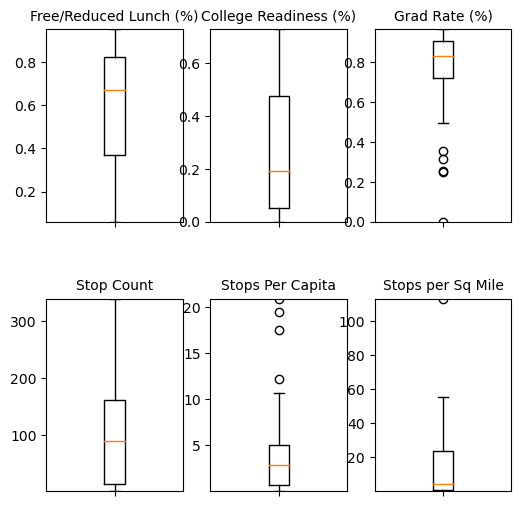

In [13]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=False)

# Plot boxplots and set titles
columns = ['Free/Reduced Lunch (%)', 'College Readiness (%)', 'Grad Rate (%)', 'Stop Count', 'Stops Per Capita', 'Stops per Sq Mile']
for i, col in enumerate(columns):
    row = i // 3
    col_num = i % 3
    axs[row, col_num].boxplot(final_clean_df[col])
    axs[row, col_num].set_title(col, fontsize =10)

    # Calculate specific min and max values for the current column
    col_min = final_clean_df[col].min()
    col_max = final_clean_df[col].max()

    # Set y-axis limits to specific min and max values of the current column
    axs[row, col_num].set_ylim(col_min, col_max)

    #Hide x-axis tick labels
    axs[row, col_num].set_xticklabels([])
    
# Adjust subplot spacing
fig.subplots_adjust(hspace=0.4)

plt.show()

In [14]:
#Apply function to DataFrame
cleaned_df = remove_outliers(final_clean_df)
cleaned_df

,Zipcode,Latitude,Longitude,Free/Reduced Lunch (%),Grad Rate (%),College Readiness (%),Stop Count,Stops Per Capita,Stops per Sq Mile
384,48009,42.5444,-83.2133,0.060724,0.951429,0.730104,2,0.095988,0.395578
499,48021,42.4658,-82.9459,0.811868,0.762774,0.000000,12,0.369015,2.338599
382,48030,42.4608,-83.0982,0.729461,0.536873,0.139918,14,0.844034,4.970329
51,48073,42.5190,-83.1570,0.233831,0.883436,0.541096,2,0.059172,0.271037
445,48075,42.4638,-83.2255,0.732545,0.857143,0.177215,44,2.030270,5.949468
...,...,...,...,...,...,...,...,...,...
31,49525,43.0135,-85.6027,0.328358,0.798825,0.538462,12,0.407498,0.489062
430,49534,43.0141,-85.7543,0.488979,0.772727,0.379310,47,2.168200,1.303005
30,49544,43.0073,-85.7255,0.452039,0.853556,0.306604,21,2.108430,1.001814
359,49546,42.9280,-85.5483,0.209477,0.957447,0.683706,70,2.074870,3.746581


In [15]:
cleaned_df.to_csv('final_df.csv', index=False)